### Live Sentiment Analysis

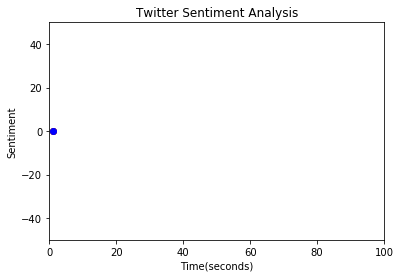

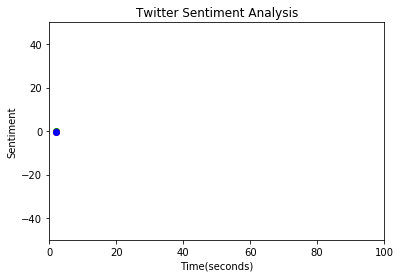

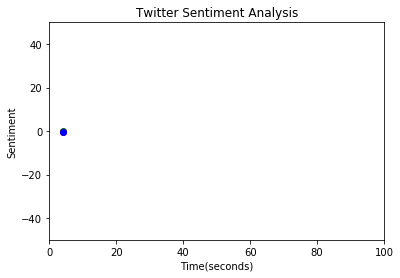

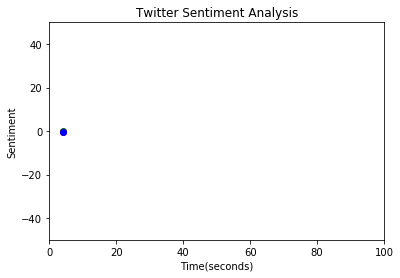

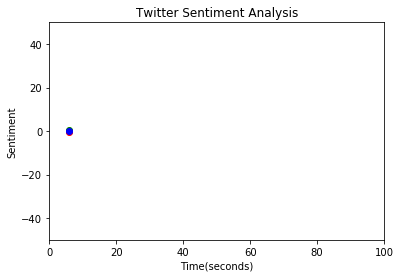

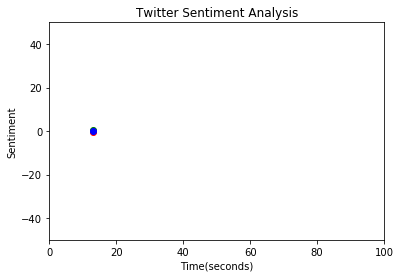

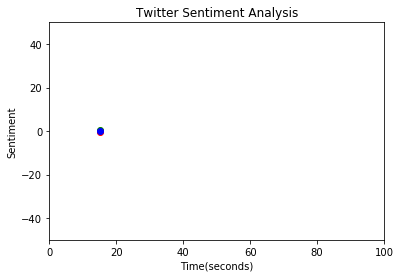

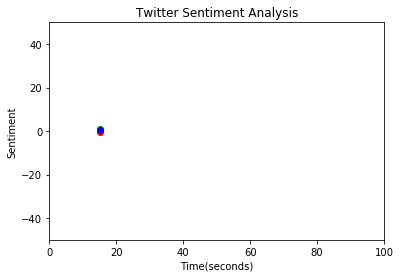

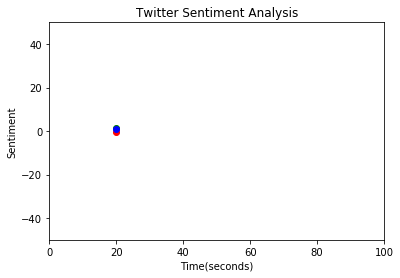

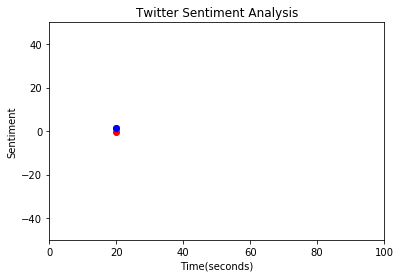

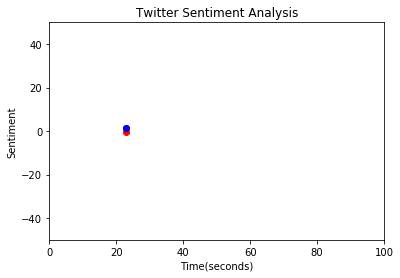

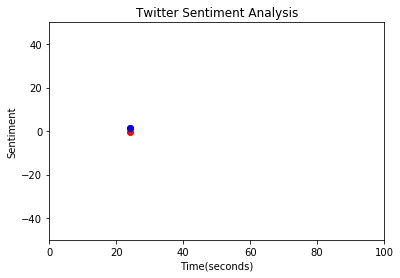

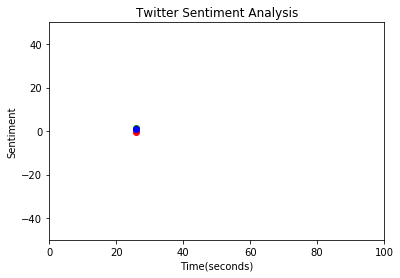

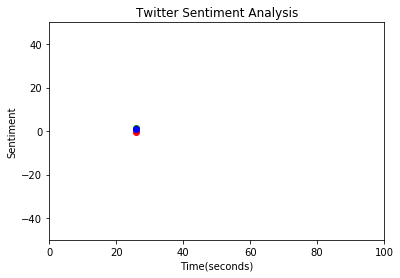

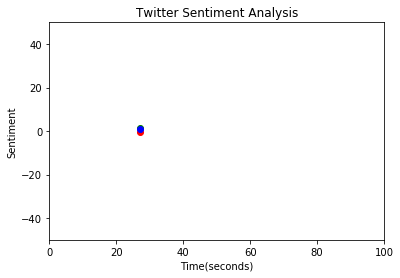

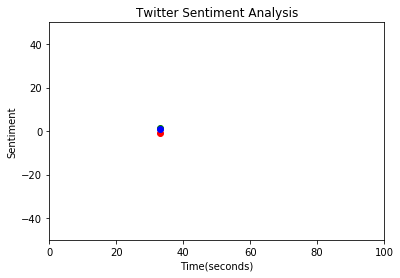

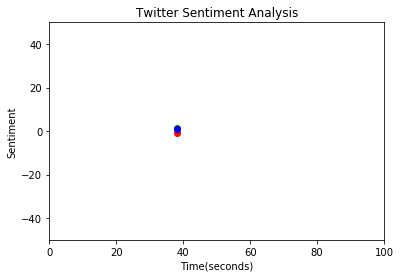

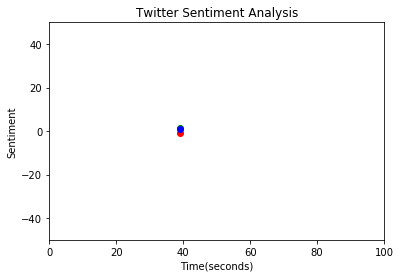

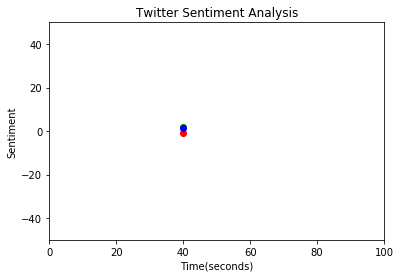

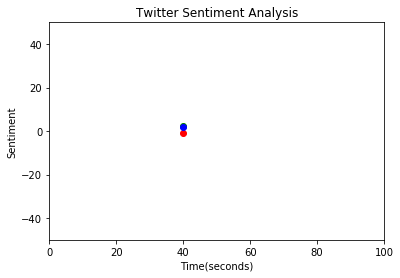

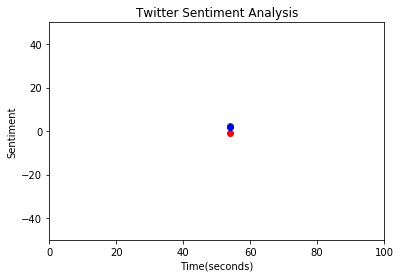

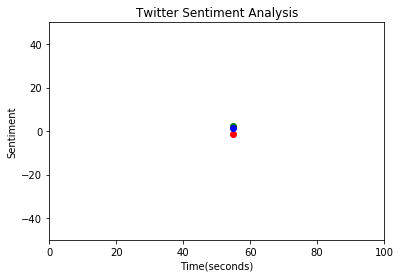

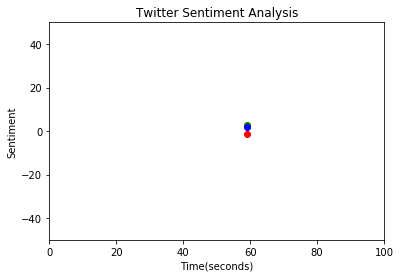

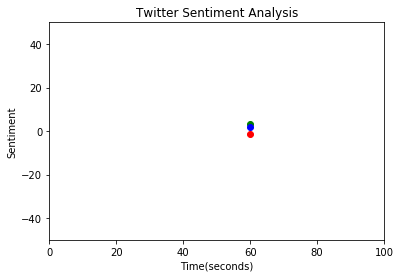

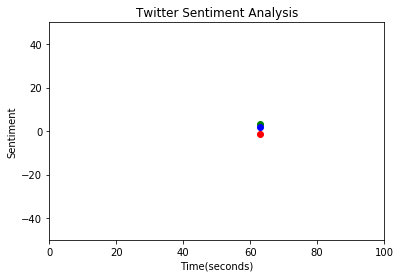

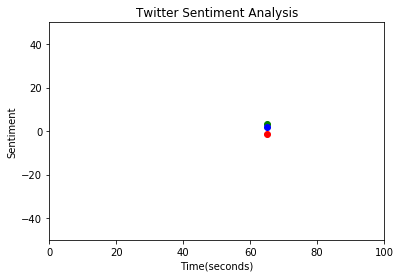

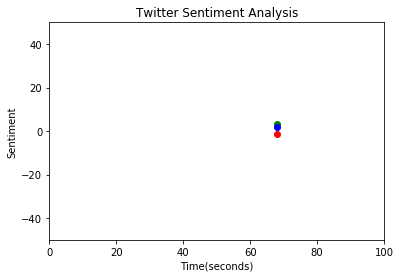

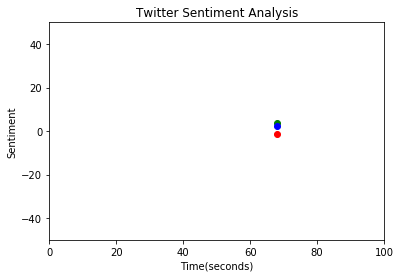

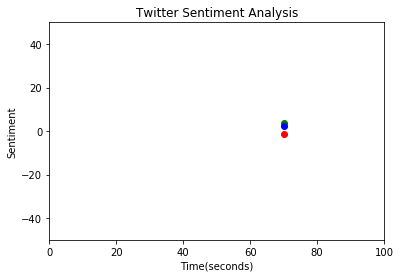

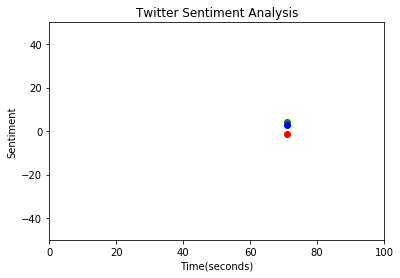

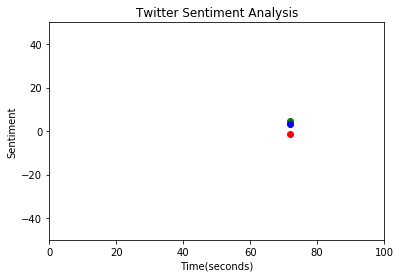

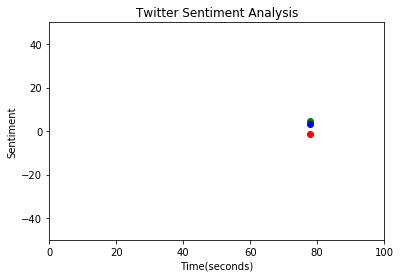

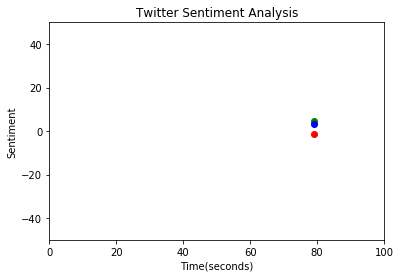

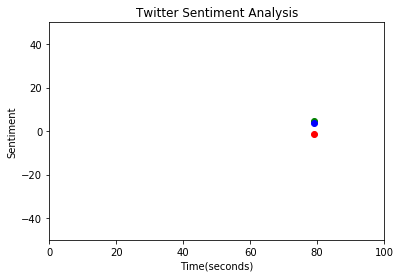

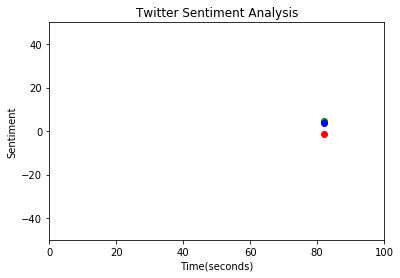

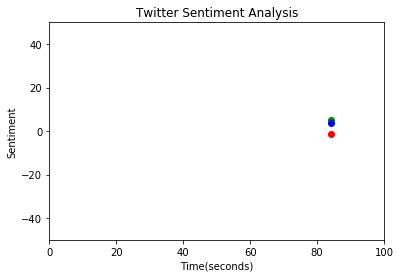

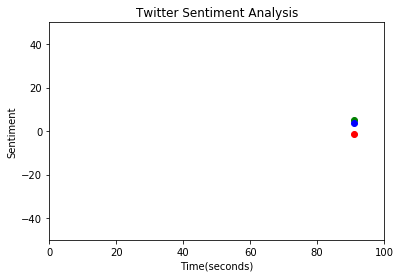

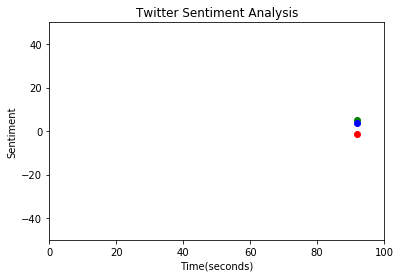

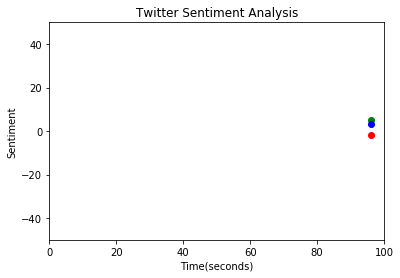

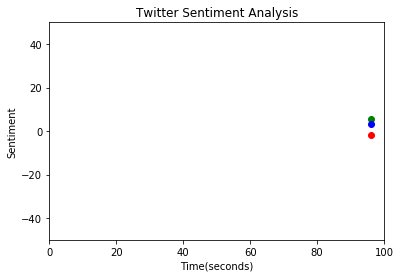

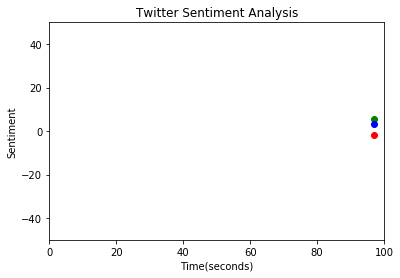

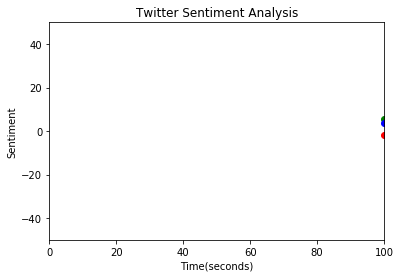

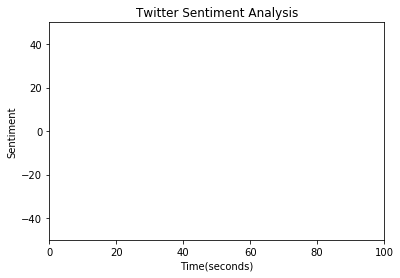

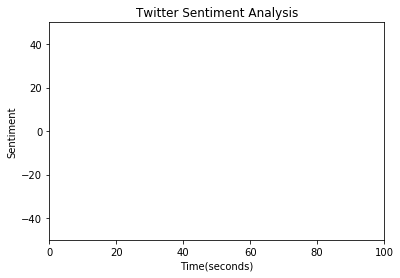

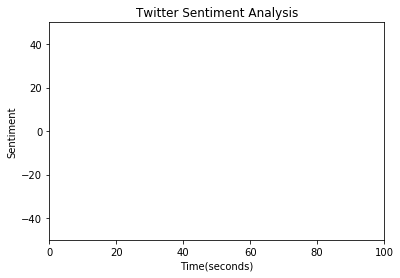

In [ ]:
import time
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import json
from textblob import TextBlob
import matplotlib.pyplot as plt
import re
#import numpy as np
import matplotlib.pyplot as plt

# Subtracts current time from the time we started
def calctime(a):
    return time.time()-a

positive=0
negative=0
compound=0

count=0

# Initializes time
initime=time.time()

# Makes an interactive plot
plt.ion()

# consumer keys and access tokens
ckey = 'UsWHoZAH2rm8JKj1lT0I4jI6z'
csecret = 'cCqPOojWJhrRge00TcsM7vYSzEd8DD0sXwgWzCehQcNyLPoJcO'
atoken = '406751090-OBSfcxUR6j9NMS8CRvs3AKj4p58xYFxlenK4ldWl'
asecret = 'wBrjCcOz6qbeoOPYuWthVOD627o5H1qUZOJ3S1AeEjZJ9'

class listener(StreamListener):
    # This executes whenever we get a tweet
    def on_data(self,data):
        global initime
        # Calculates time by calling calctime function
        t=int(calctime(initime))
        # Gets the data in the form of json
        all_data=json.loads(data)
        # Tweet is presented in this
        tweet=all_data["text"].strip()
        # username=all_data["user"]["screen_name"]
        # Clean up the tweet by only containing the alphabet not special characters 
        tweet=" ".join(re.findall("[a-zA-Z]+", tweet))
        # We pass the stripped tweet that we can use for sentimental analysis
        blob=TextBlob(tweet.strip())
        
        # Variables for analysis
        global positive
        global negative     
        global compound  
        global count
        
        count=count+1
        senti=0
        # Goes through each sentiment in list
        for sen in blob.sentences:
            # Calculates sentiment for each sentence and add to senti variable
            senti=senti+sen.sentiment.polarity
            # If the polarity of the sentiment is positive 
            if sen.sentiment.polarity >= 0:
                # Add it to the positive variable
                positive=positive+sen.sentiment.polarity  
            # If the polarity of the sentiment is negative
            else:
                # Add it to the negative variable
                negative=negative+sen.sentiment.polarity
        # The total sentiment
        compound=compound+senti  
        
        #print ("Tweet number: " + str(count))
        #print ("Tweet description: " + str(tweet.strip()))
        #print ("Tweet sentiment: " + str(senti))
        #print ("Time to access tweet: " + str(t))
        #print ("Positive sentiment: " + str(positive) + ' ' + "Negative sentiment: " + str(negative) + ' ' + "Nuetral sentiment: " + str(compound))
        
        # x axis = 0 - 100 # y axis = -50 - 50
        plt.axis([ 0, 100, -50,50])
        # x axis label
        plt.xlabel('Time(seconds)')
        # y axis label
        plt.ylabel('Sentiment')
        # Title 
        plt.title("Twitter Sentiment Analysis")
        # go = green dot(positive)  
        plt.plot([t],[positive],'go')
        # ro = red dot(negative)
        plt.plot([t] ,[negative],'ro')
        # bo = blue dot(nuetral)
        plt.plot([t],[compound],'bo')
        # Shows the plot
        plt.show()
        # Pause the plot so it's not continuous
        plt.pause(0.0001)
        
        # When tweets reach 500 stop program
        if count==500:
            return False
        else:
            return True
        
    # Handles errors 
    def on_error(self,status):
        print (status)

        
# Authenticating it by passing the keys and tokens in the functions
auth=OAuthHandler(ckey,csecret)
auth.set_access_token(atoken,asecret)

# Start streaming , count = variable that is passed in
# If count == 200 the program will stop making tweets stop @ 200
twitterStream=  Stream(auth, listener(count))

# Filters "Obama" 
twitterStream.filter(track=["Warriors"])